# Project Group - 20 

Members: 

1. Sheikh Arfahmi Bin Sheikh Arzimi (6452868)

2. Ewan Brett (6525318)

3. Cedric Nissen (6560733)

4. Nils Hollnagel (6540848)

5. Luka Rehviašvili (6299318)

# Research Objective (Luka)

To develop an interactive dashboard that aids effective crowd flow management for the SAIL2025 event in Amsterdam.

# Introduction 

Effective crowd management is essential to ensure public safety and improve visitors’ experience at large-scale events such as SAIL 2025 in Amsterdam. Without sufficient crowd monitoring, crowd managers may lack oversight of crowd densities, potentially increasing the risk of overcrowding and related safety incidents. Past tragedies, such as the Seoul Halloween Parade in 2022, Houston’s Astroworld Festival in 2021 and Germany’s Love Parade in 2010, underscore the importance of proactive crowd monitoring and prediction systems. This project, therefore, aims to develop an interactive dashboard that serves to aid the SAIL Crowd Monitoring Team (CMT) in making informed decisions in real-time to manage crowd levels effectively and efficiently. Beyond SAIL, this dashboard could also be a modular tool which can be implemented by other large-scale event organisers worldwide. This project is also part of the broader crowd management strategy and will be integrated with physical control measures to form a holistic solution to crowd management challenges. 

To be adjusted

# Research Questions

RO: To develop an interactive dashboard that aids effective crowd flow management for the SAIL2025 event in Amsterdam.​
​
RQ1: Which measure can be used to enable secure access control?​
RQ2: How can crowd flow be visualised most effectively?​
RQ3: Which algorithm is suitable to predict crowd flow based on the available datasets?

To be expanded

# Data Used (Luka)

To be adjusted

## Confirmed Datasets

1.	Crowd flow (based on sensor counts)

    •	Number of sensors: 46 locations, bidirectional

    •	Refresh rate: Every 3 minutes

2.	SAIL Event timetable (https://www.sail.nl/programma-en-plattegrond)

3.	Geospatial Information of Sail 2025 Area (OpenStreetMaps, ArcGIS)

## Potential Datasets (Pending Requests)

1.	Vessel position

2.	Positions of traffic marshals

3.	NS Train (live) Timetables (https://ndovloket.nl/index.html) 

4.	GVB (live) Timetables - Metros, Trams, Buses (https://ndovloket.nl/index.html) 

5.	Meteorological data (based on KNMI data, alternative https://www.wunderground.com/history/weekly/nl/schiphol/EHAM/date/2025-8-20 copy to Excel and export as CSV)



# Answering RQ1: User Authentication (Nils)

## 1.1 Introduction

To answer the research wuestion RQ1 (Which measure can be used to enable secure access control?​), several methods of user authentication functionalities were investigated. At first, the OpenID Connect Methode enables useres to log into a streamlit page using existing Google or Microsoft Accounts. As a second option, a widely applied username and password based solution was evaluated. The later option was selcted as is allows a step-by-step approach in the construction of code that is easy to follow for the sake of this project. This mainly holds because all functionalities are streamlit based and no external links must be established. The developement of helper and main functions to implement the approach into streamlit can be reviewed in the [User_Authentication](Notebooks/User_Authentication.ipynb) file.

## 1.2 Login Interface

![Login Interface](screenshots/Login.png)

The Login Interface forms the basis for any user interaction. Assuming the user has an existing account (either predefined by system admin or self-created through Sign-Up), the user is guided through the login procedure. Upon successful completion of the process, full access to all dashboard pages is granted. The user stays logged-in until he* decides to log out again.

## 1.3 Sign-Up Interface

![Sign-Up Interface](screenshots/Sign_up.png)

In case the entered username is non-existant, the system will advise the user to either check for spelling errors or create a new account by signing up. The newly entered credentials are then stored in a pickle database. To enhance security, passwords are always encoded via hashing before storage. 

## 1.4 Access Control across the Dashboard

As the Sail2025 Crowd Management Dashboard features multiple pages (e.g.: Homepage, Settings Page, etc.), the user authentication must guarantee that all pages can only be accessed after a user has successfully logged in. This is achieved by calling a function (check_login_status()) before any content of any page is loaded. To showcase this functionality, the screenshot below illustrates the error message thrown at the user when trying to access pages without loggig in.

![Access Denial](screenshots/Access_denied.png)

Furthermore, the user is directly guided to the home page, where the login page is displayed by default. He* can then make user of the above-expained Login and Sign-Up Interfaces.

# Answering RQ2: Crowd Flow Visualisation (Ewan, Cedric)

## 2.1 Introduction

Visualising the data provided by the sensors dotted around the inner city and port of Amsterdam allows the user to identify urgent situations and act accordingly to mitigate any potential risk. Displaying past data further allows to identify patterns in crowd behaviour. The type of visualisation choosen must be appropriate for its intended purpose. As a result, different types of map visualisations for live data monitoring and a line graph to illustrate past data was employed. In the following sections, the various methods employed to visualise crowd data are explained in detail. 

## 2.2 Crowd Flow

In order to not only display the crowd count, but also relates it to the effective width and the time interval of three minute, the crowd flow is calculated. The function "calculate_crowd_flow" devides the crowd count by the effective width of the respective sensor and devides it with the 3 minute interval. The resulting crowd flow can depict the relative intensity at the location of the sensor. This function takes a timestamp as an input and calculates the resulting crowd flow for the respective timestamp. Finally, a dictionary with the crowd flow is returned which could be appended to dataframes or displayed directly on a map or graph. Each sensor direction is calculated and returned seperately.

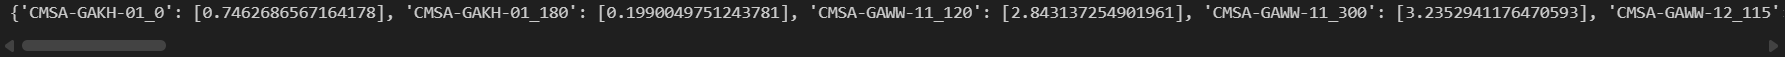

## 2.3 Time-sensitivity, simulating live data

Within this project, to make the dashboard as oriented to the real world scenario, we developed an auto refresh, this is done by using a session state which would update the dashboard every three minutes (how often the data was updated), this allowed for it to show the most recent data that was received. This is done by telling the programme to read the next line of the csv file, this continues while viewing other pages created. Within this, a feature was created in which after a refresh the position of the map (zoom and area of focus) would be preserved, as to not move it back to any default settings. 

## 2.4 Map Visualisation

Regarding visualisations, we choose three main types, bidirectional arrows, circles, and a heat map. Each serves a different purpose. At each measuring location, there are two directions counted 180 degrees from each other. Therefore, with the bidirectional arrows, you can easily visualise the count per sensor locations for both directions. Allowing for an easy overview, per location per direction. With the heat map, it shows a clearer overview across the whole area, making it easier to see high density and low density areas. In terms of colour coding, with the bidirectional arrows, this was split up into 4 groups, this was done based on the maximum counts. With the heat map, the colours were standard, therefore green/blue means low intensity and red means high intensity. 
To show both crowd count and crowd flow, a toggle was created which allows the switching between both modes. For each type the same visualisations are shown, to allow consistency when viewing the data.

![Map](screenshots/heat_map.png)
![Map](screenshots/bidirectional_arrows.png)

## 2.5 Multi-User Settings

A settings page was created; this allows for user preferences to be kept. This allows for one user to open on the visualisation of a heat map, whereas another user can decide to open it on heat maps. They are saved for each user, on their account. 

## 2.6 Crowd Data Graph

The page "Crowd Data Graph" displays the crowd count as a line graph. The graph as shown below displays the data from a datagraph which updates live, adding the data from the latest timestamp to the dataframe. For this purpose, the function "add_new_row" is used. Similarly to the map explained above, the graph page uses the autorefresh function, employing a session state which reloads the graph every three minutes. The directions of the sensors are displayed seperately.

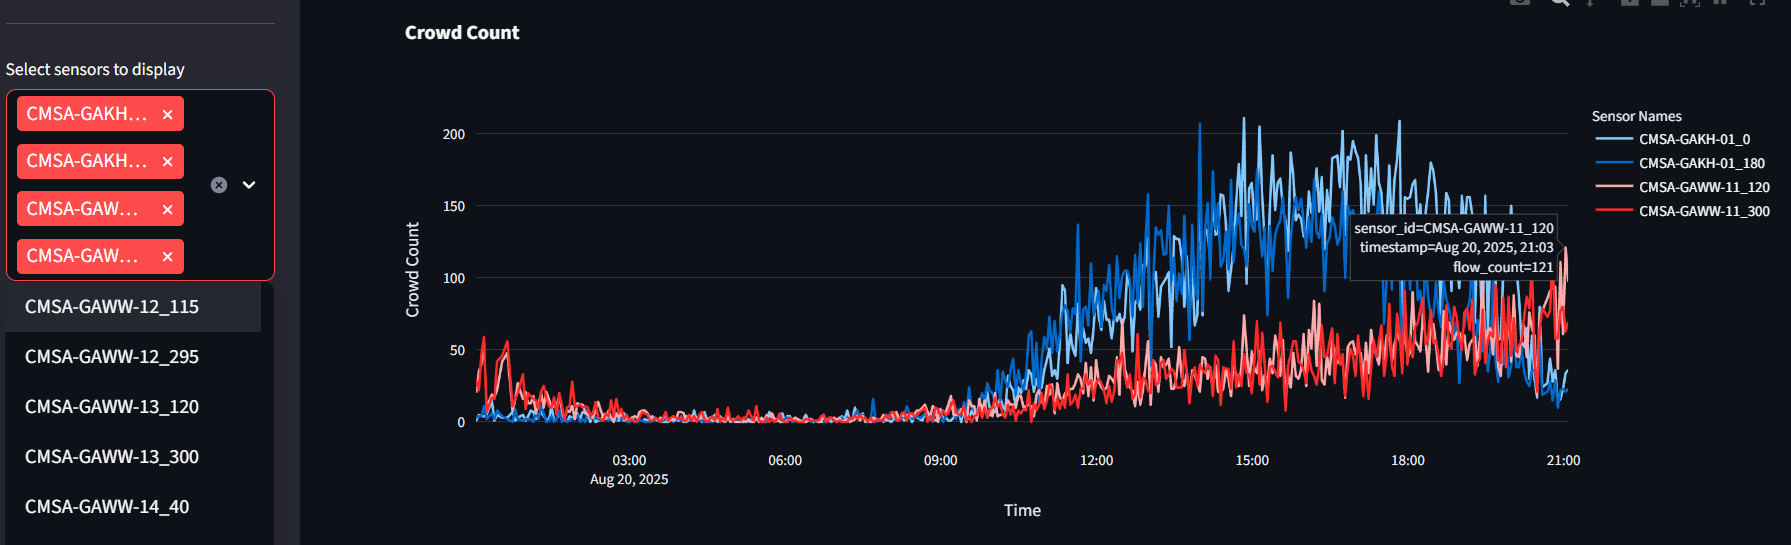

The page allows the user to select and deselect all sensors which would be displayed with different colours. Additionally, when hovering over the graph, the precise timestamp and count is displayed.

# Answering RQ3: Crowd Flow Predictions (Sheikh)

To be added

- Methodology
- Results
- Crital Evaluation (Accuracy of Prediction)

# RQ3 Crowd Count Prediction

## 3.1 Introduction 

Crowd count prediction serves to estimate the number of people across space and time. In this case, space is divided based on the location of crowd count sensors and time is split into 3-minute intervals based on the sensor update frequency. Therefore, the goal is to predict the future crowd counts for each available sensor in multiples of 3-minutes intervals (i.e 3, 6, 9 ... into the future). The Extreme Gradient Boosting (XGBoost) machine learning model was experimented with in this project. It was selected due to its robustness and ability to predict non-linear relationships. The next few subsections will outline the steps taken to develop this model. 

## 3.2 Data Sources / Requirements / Preprocessing

The data sources used are: (i) Crowd Count from Sensors (by timestamp and sensor name), and (ii) KNMI Weather Data (by timestamp, includes Temperature, Dew Point, Air Pressure, Windspeed, Max Gust, Rainfall, Sunshine Duration). Both are comma-separated-value (.csv) files located in [sensor_data](data/sensor_data.csv) and [weather_data](data/weather_data.csv) respectively. They were imported, inspected for missing values and cleaned. The data was then visualised to capture general trend(s). This process can be found in [Read_Sensor_(Crowd)_Data](Notebooks/Read_KNMI_WeatherData.ipynb) and [Read_KNMI_WeatherData](Notebooks/Read_KNMI_WeatherData.ipynb). Both datasets were then merged into one single dataframe with timestamp set as index and saved as [crowd_weather_merged.csv](Notebooks/data/crowd_weather_merged.csv) . The crowd count and weather trends are shown below.

![Crowd Count Trend](screenshots/sensor_trend.png)

From the almost sinuisoidal curve of the crowd count, we can tell that the overall crowd count peaks daily at around late afternoon and dips slightly after midnight. This is the general crowd trend, but the distribution across sensors may vary greatly. 

![Weather Trend](screenshots/weather_trend.png)

From the weather data, no general trends can be concluded. However, rainfall was zero for most of the event and thus, it can be hypothesised that rainfall will not be a strong feature to predict the crowd count. 


## 3.3 Target and Features

The target 'Y' of the XBG model is the data to be predicted, which is the future crowd count of all sensors. The features, 'X', are the remaining data in [crowd_weather_merged.csv](data/crowd_weather_merged.csv). They include 'hour', 'minute', 'day', 'month', 'weekday', 'is_weekend', 'temperature' , 'dew_point', 'air_pressure', 'wind_speed', 'max_gust', 'rainfall', 'sunshine_duration' and 'relative_humidity'.

Prior to training the XGB model, pre-ML data exploration was conducted to investigate the correlation between the different data types. This process can be followed in [Pre_ML_DataExploration](Notebooks/Pre_ML_DataExploration.ipynb). The data exploration gives us insights on the expected results and feature importances of the trained machine learning model. 

![Correlation Matrix: Sensor vs Sensor](screenshots/corr_sensor_vs_sensor.png)

For example, in the correlation matrix among crowd count of sensors above, we can see a positive correlation among sensors pairs with  opposing directions (CMSA-GAKH-01_0 and CMSA-GAKH-01_180). However, there is weak correlation between sensors that are further apart. (Note that in the figures below, there is insufficient space to print all the y labels)

![Correlation Matrix: Sensor vs Weather](screenshots/corr_sensor_vs_weather.png)

The correlation matrix between weather data and crowd data was also plotted to see which feature has strong or weak correlation with crowd data. As shown in the figure above, the 'hour' feature has the strongest overall correlation with the crowd count. It is thus expected to be one of the most important feature for the XGB model. Other potentially important features include 'temperature', 'wind speed', 'max_gust', 'sunshine duration' and 'relative humidity'. 

From the graph of Total Crowd Count over Time above, it was found that historical data may be able to predict current data as the crowd count shows some seasonality characteristics. To determine how far back in time should crowd count be considered as feature, an Autocorrelation Function (ACF) graph of CMSA-GAKH-01_0 was plotted. The x-axis of the graph indicates the time interval between the current observation and past ones, also know as the 'lag', while the y-axis represents the correlation values between current observation and observation at a particular lag. The blue shaded area represents the 95% confidence interval. Any bars that extend beyond (above/below) the blue area is statistically significant. 

![Autocorrelation of CMSA-GAKH-01_0](screenshots/autocorr_CMSA_01_0_1000lags.png)

From the graph above, it was observed that there are significant spikes at regular intervals of 200-250 steps. This confirms seasonality in the crowd data, yet not all of the lags are statistically significant. Therefore, another ACF was plotted to zoom into the lags that are statistically significant.

![Autocorrelation of CMSA-GAKH-01_0](screenshots/autocorr_CMSA_01_0.png)

From the graph above, we can deduce that lags up to lag_75 are statistically significant and thus will be considered as features. 

In addition to lag features, rolling mean features were also included. Rolling mean is the average of crowd count over a fixed interval of historic data. It's purpose is to smooth out short-term volatility and reduce noise to reveal underlying and longer term trends. The rolling mean intervals were chosen to capture short-term (3-5), medium-term (10-20) and long-term (30-60) trends. The additional features were created and then appended to the merged dataframe.

## 3.4 Training Procedure



![Train-Test Split](screenshots/train_test_split.png)

The features and target were split chronologically with data from 20-23 August 2025 assigned as training data, while the remaining data (23 August 2025, 00:00 onwards) assigned as test data. Random splitting were also experimented with in [TS_2_RandomSplit_MultiOutputReg](Archived_PastNotebooks/TS_2_RandomSplit_MultiOutputReg.ipynb). However, the approach involves the leakage of future data into the prediction of past/current data and was thus rejected as a realistic approach. 

Another approach in the training strategy was also to train one model per sensor ([TS_1_RandomSplit](Archived_PastNotebooks/TS_1_RandomSplit.ipynb)), as opposed to one universal model for all sensors. However, upon quick inspection of the crowd count of all the sensors, it was observed that most sensors follow the seasonality pattern and peak at similar times. Thus, a single model was preferred for ease of maintenance and to reduce overfitting. 




## 3.5 Model Evaluation

The metrics used to evaluate the model are mean absolute error (MAE) and root-mean-squared error (RMSE). Instead of focusing on the performance of the model in general, the model was evaluated based on how well it predicts data for each location. This is more meaningful as it accounts for the differences between locations. The model performed best for GASA-06_95 with MAE = 0.080795 and RMSE = 0.087036.

![Actual vs Predicted: GASA-06_95](screenshots/GASA-06_95.png)

On the other hand, it performed worst for GASA-02-02_135 with MAE = 25.207134 and RMSE = 58.591652. 

![Actual vs Predicted: GASA-02-02_135](screenshots/GASA-02-02_135.png)

The model's feature importance was validated against insights gained from data exploratory. 

![Feature Importance](screenshots/feature_importance.png)

Based on the figure above, the mean of the past 3 time intervals (past 9 minutes) was the most important feature in predicting the current crowd count. The top features were also dominated by rolling mean and lag features, which matches the strong seasonality pattern observed across most of the locations. In general, weather features were less important compared to historical data, though it should be noted that temperature is the most important feature in the model among all weather features. 

## 3.6 Deployment Strategy 

The XGB model is stored locally as [crowd_count_model.pkl](Notebooks/crowd_count_model.pkl) and loaded in [4_Predictive_Analysis.py](pages/4_Predictive_Analysis.py). The streamlit app fetches live sensor data via load_live_sensor_data() in [data_loader.py](data_loader.py) every 3 minutes. A function create_features() was created to transform historic and current data as inputs to the model. Predictions are genererated on demand per sensor selection. By default, the forecasting window is set to 20 intervals (1 hour) and the prediction is done recursively using recursive_forecast() function. The results were plotted in an interactive line graph that shows historical, current and predicted counts. For the purpose of visualising the accuracy of predictions, actual future counts were also plotted. In terms of User Interface, colour scheme was standardised across all graphs for the different type of data, with legends present to assist users. The default zoom focuses on the past hour plus the forecast horizon for immediate insight. The figure below shows a screenshot of the predictive analytics visualisation. 

![PredictiveAnalytics](screenshots/predict_graph.png)

In terms of extensibility, The model can be updated periodically with new sensor and weather data. 

## 3.7 Limitations of Model 

The [weather data from KNMI](Notebooks/data/uurgeg_240_2021-2030.txt) was tracked hourly. Therefore, shorter-term changes in weather conditions were not captured and this could explain the weak importance of weather features in predicting the crowd count. Additionally, more data, such as event timeline and location, vessel position, carflow data, could be added into the pipeline and this could strengthen the model. In terms of training strategy, the trained XGB model was tested only on weekend data. This explains why the 'isWeekend' feature is not important at all. If the SAIL event was longer with more data points, the train-test split could be done such that the training and testing data consist of both weekday and weekend data while still maintaining a chronological split. The hyperparameters of the XGB model could also be optimised with Hyperparameter Tuning, creating a model with the best performance for this use case. However, this was not done due to time limitation of this project. Lastly, to increase usability and user-friendliness, the predicted values for all sensors could be visualised in a map with adjustable time horizon. Thresholds could be set to warn crowd monitoring team of higher than acceptable crowd counts. 

# Conclusion (Nils)

- Main Research Findings
- Limitations
- Outlook --> Further Research

Concluding this project, all posted research question were answered within the development of the dashboard. Starting off, a user authetication process is featured to ensure that only legitimate users can access the dashboard(RQ1). Furthermore, a combination of different visualisation types is applied to aid crowd management operators within their daily operations (RQ2). The customizable map displaying current crow flow data allows an overview while deeper insights can be gained by navigating to the Crowd Flow Graphs and Vessel Positioning Pages. The Predictive Analysis page aids operators in developing a future crowd management strategy based on past developement (RQ3). They must not rely on their own conclusions drawn from visualisations of the current situation but can count on the ML model insights. 

Even though all RQs have been answered, there are several limitations and opportunitioes for further research. In regards to the user authentication process, it must be mentioned that the Sign-Up option currently allows any user to create a profile. In a real case, this feature should be disabled or expanded by am additional verification so that only legitimate users are granted access. Additionally, a passord reset feature could be investigated and added to the system.

Looking at the Crowd Flow Visualisation, xxx to be added

In terms of Predictive Analysis, the variety of datasets used may be increased to improve prediction accuracy. In addition, the visualisation could be adapted so that the map visualisation (home page) also features predictive insights. Consequently, user-friendlyness can be increased. Drawing attention to further research, other ML model besides the applied XGB could be applied and evaluated against each other.


# Contribution Statement (Everyone)

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1: Sheikh Arfami Bin Sheikh Arzimi **: 
- Coding: Future Crowd Flow Prediction (ML Module)
- Reporting: RQ3 Crowd Flow Predictions
- Project Management (Task Distribution)

**Author 2: Nils Hollnagel **: 
- Coding: User Authentication
- Reporting: RQ1 User Authentication & Conclusion
- Project Management (Report Structure, Task Distribution, Group Organisation)

**Author 3: Cedric Nissen **: 
- Coding: Crowd Data Graph, Crowd flow calculation and implementation (Home page)
- Reporting: RQ2 Crowd Flow Visualisation

**Author 4: Ewan Brett **: 
- Coding: Home page automatic updating, visualisations
- Reporting: RQ2 Crowd Flow Visualisation

**Author 5: Luka Rehviašvili **: 
- Coding: Vessel Positioning, Car Flow Data Visualisation
- Reporting: Research Objective & Data Used